In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./datasets/data.csv", index_col="EmployeeID")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4410
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus            4410 non-null   object 
 14  MonthlyIncome            4410

EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age   
EmployeeID                                                                   
1                               3.0              4.0              2.0   51  \
2                               3.0              2.0              4.0   31   
3                               2.0              2.0              1.0   32   
4                               4.0              4.0              3.0   38   
5                               4.0              1.0              3.0   32   

           Attrition     BusinessTravel              Department   
EmployeeID                                                        
1                 No      Travel_Rarely                   Sales  \
2                Yes  Travel_Frequently  Research & Development   
3                 No  Travel_Frequently  Research & Development   
4                 No         Non-Travel  Research & Development   
5                 No      Travel_Rarely  Research & Development   

            DistanceFromHome  Education EducationField  ... StockOptionLevel   
EmployeeID                                              ...                    
1                          6          2  Life Sciences  ...                0  \
2                         10          1  Life Sciences  ...                1   
3                         17          4          Other  ...                3   
4                          2          5  Life Sciences  ...                3   
5                         10          1        Medical  ...                2   

            TotalWorkingYears TrainingTimesLastYear YearsAtCompany   
EmployeeID                                                           
1                         1.0                     6              1  \
2                         6.0                     3              5   
3                         5.0                     2              5   
4                        13.0                     5              8   
5                         9.0                     2              6   

            YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement   
EmployeeID                                                                  
1                                 0                     0               3  \
2                                 1                     4               2   
3                                 0                     3               3   
4                                 7                     5               2   
5                                 0                     4               3   

            PerformanceRating  DaysNotWorked  AverageHoursPerday  
EmployeeID                                                        
1                           3             29            7.373651  
2                           4             25            7.718969  
3                           3             19            7.013240  
4                           3             26            7.193678  
5                           3             16            8.006175  

[5 rows x 27 columns]

We have a dataset with 4410 individuals and 27 variables. There are a few missing values in the numerical columns 'NumCompaniesWorked' 'TotalWorkingYears' (other missing values in some categorical variables have already been imputed in a previous notebook with an additional 'Unknown' category). We want to predict the 'Attrition' column.
We identify 14 categorical variables and 12 numerical variables.

In [3]:
categorical_columns = [
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance",
    "BusinessTravel",
    "Department",
    "Education",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "JobLevel",
    "StockOptionLevel",
    "JobInvolvement",
    "PerformanceRating",
]
numerical_columns = [
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "DaysNotWorked",
    "AverageHoursPerday"
]

col_with_NA = ['NumCompaniesWorked', 'TotalWorkingYears'] # Use mean imputation later (numerical features with few missing values)

target_column = "Attrition"

In [4]:
data[target_column].value_counts() # imbalanced dataset

Attrition
No     3699
Yes     711
Name: count, dtype: int64

In [5]:
# Convert the categorical features to object data type
data[categorical_columns] = data[categorical_columns].astype('object')

# Inference numerical features

In [6]:
# Get the summary statistics for numerical variables
data.describe().T

count          mean           std           min   
Age                      4410.0     36.923810      9.133301     18.000000  \
DistanceFromHome         4410.0      9.192517      8.105026      1.000000   
MonthlyIncome            4410.0  65029.312925  47068.888559  10090.000000   
NumCompaniesWorked       4391.0      2.694830      2.498887      0.000000   
PercentSalaryHike        4410.0     15.209524      3.659108     11.000000   
TotalWorkingYears        4401.0     11.279936      7.782222      0.000000   
TrainingTimesLastYear    4410.0      2.799320      1.288978      0.000000   
YearsAtCompany           4410.0      7.008163      6.125135      0.000000   
YearsSinceLastPromotion  4410.0      2.187755      3.221699      0.000000   
YearsWithCurrManager     4410.0      4.123129      3.567327      0.000000   
DaysNotWorked            4410.0     24.734694      5.503779     13.000000   
AverageHoursPerday       4410.0      7.700792      1.340218      5.950504   

                                  25%           50%           75%   
Age                         30.000000     36.000000     43.000000  \
DistanceFromHome             2.000000      7.000000     14.000000   
MonthlyIncome            29110.000000  49190.000000  83800.000000   
NumCompaniesWorked           1.000000      2.000000      4.000000   
PercentSalaryHike           12.000000     14.000000     18.000000   
TotalWorkingYears            6.000000     10.000000     15.000000   
TrainingTimesLastYear        2.000000      3.000000      3.000000   
YearsAtCompany               3.000000      5.000000      9.000000   
YearsSinceLastPromotion      0.000000      1.000000      3.000000   
YearsWithCurrManager         2.000000      3.000000      7.000000   
DaysNotWorked               20.000000     25.000000     29.000000   
AverageHoursPerday           6.673333      7.406761      8.368703   

                                  max  
Age                          60.00000  
DistanceFromHome             29.00000  
MonthlyIncome            199990.00000  
NumCompaniesWorked            9.00000  
PercentSalaryHike            25.00000  
TotalWorkingYears            40.00000  
TrainingTimesLastYear         6.00000  
YearsAtCompany               40.00000  
YearsSinceLastPromotion      15.00000  
YearsWithCurrManager         17.00000  
DaysNotWorked                36.00000  
AverageHoursPerday           11.03096

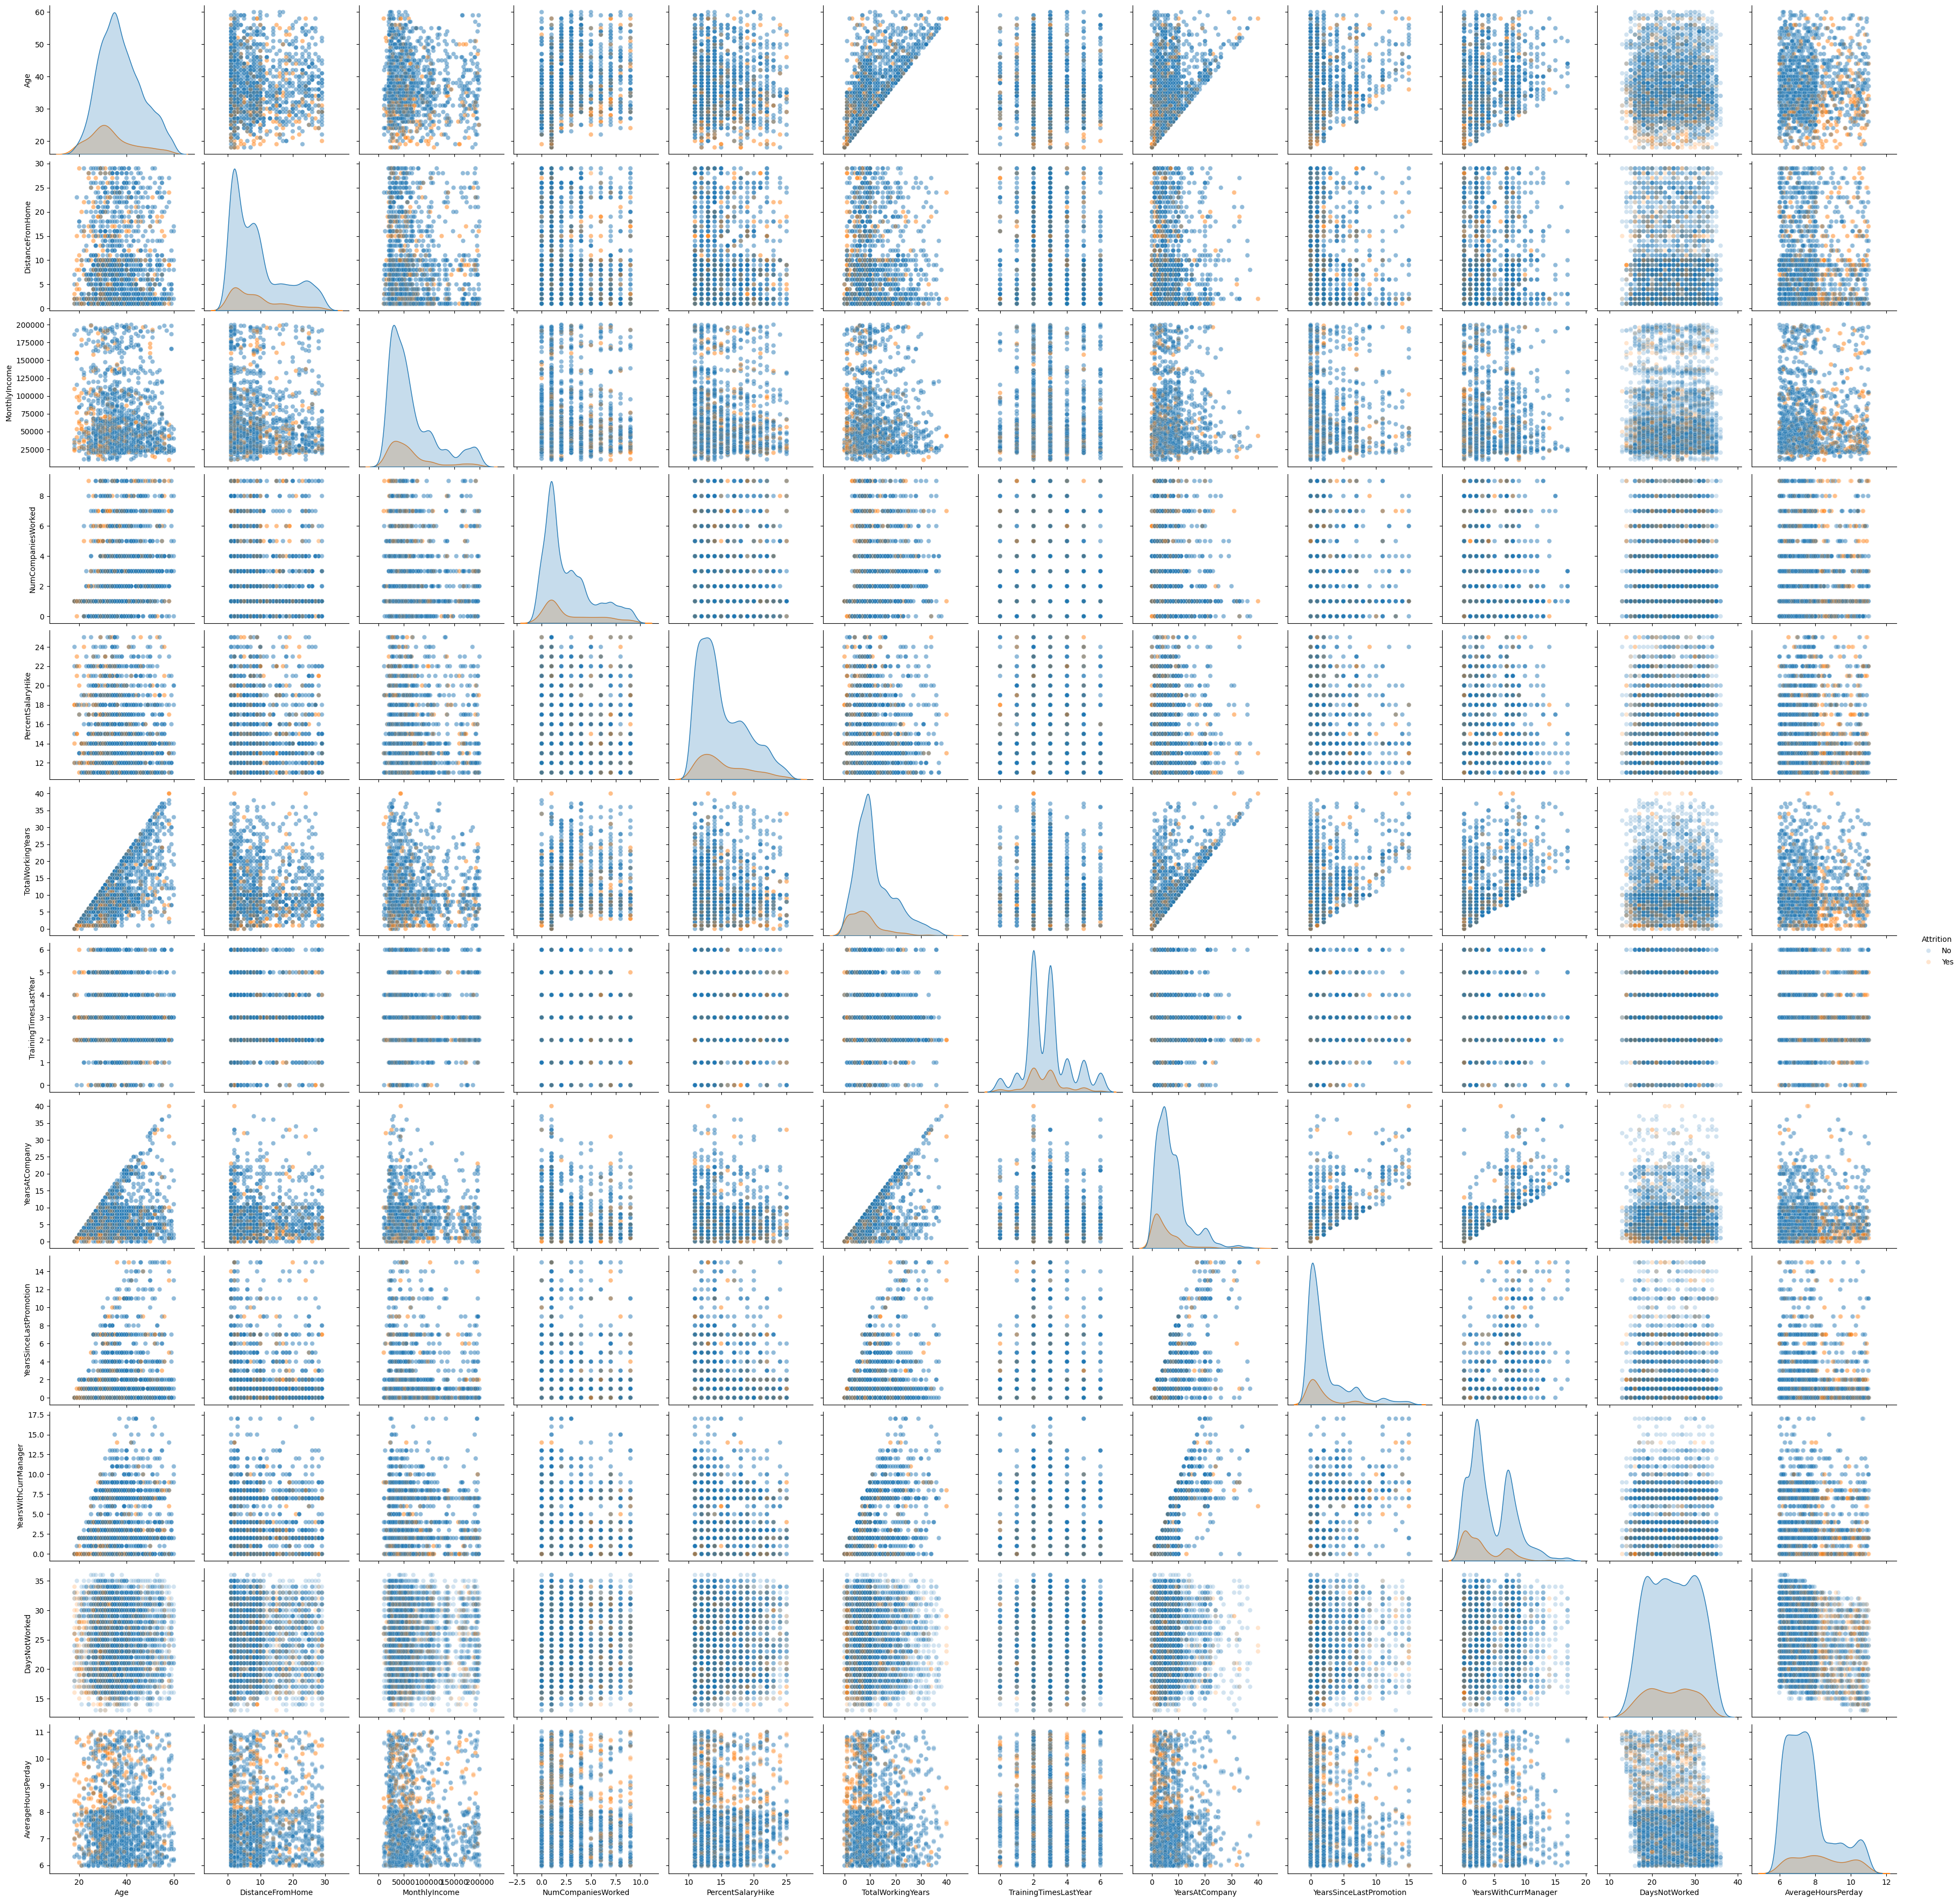

In [7]:
# We plot a subset of the data to keep the plot readable and make the plotting
# faster
n_samples_to_plot = 4410
columns = numerical_columns
_ = sns.pairplot(
    data=data[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="kde",
    #diag_kws={"multiple": 'stack'},
)

* It seems attrition only concerns employees who stayed less than 10 years at the company.
* The more hours employees work per day, the more present at work (in days) they are. Large majority work 8 or less hours per day.
* Obvious links between variables of the type TotalWorkingYears >= YearsAtCompany.
* Only a few individuals have worked more than 10 years at the company and spent less than 7.5 years with the current manager. People who stay longer in the company tend to continue with the same manager then.

# Inference categorical variables

In [8]:
# Get the summary statistics for categorical variables
data.describe(include='object')

EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance Attrition   
count                    4385.0           4390.0           4372.0      4410  \
unique                      4.0              4.0              4.0         2   
top                         3.0              4.0              3.0        No   
freq                     1350.0           1367.0           2660.0      3699   

       BusinessTravel              Department  Education EducationField   
count            4410                    4410       4410           4410  \
unique              3                       3          5              6   
top     Travel_Rarely  Research & Development          3  Life Sciences   
freq             3129                    2883       1716           1818   

       Gender  JobLevel          JobRole MaritalStatus  StockOptionLevel   
count    4410      4410             4410          4410              4410  \
unique      2         5                9             3                 4   
top      Male         1  Sales Executive       Married                 0   
freq     2646      1629              978          2019              1893   

        JobInvolvement  PerformanceRating  
count             4410               4410  
unique               4                  2  
top                  3                  3  
freq              2604               3732

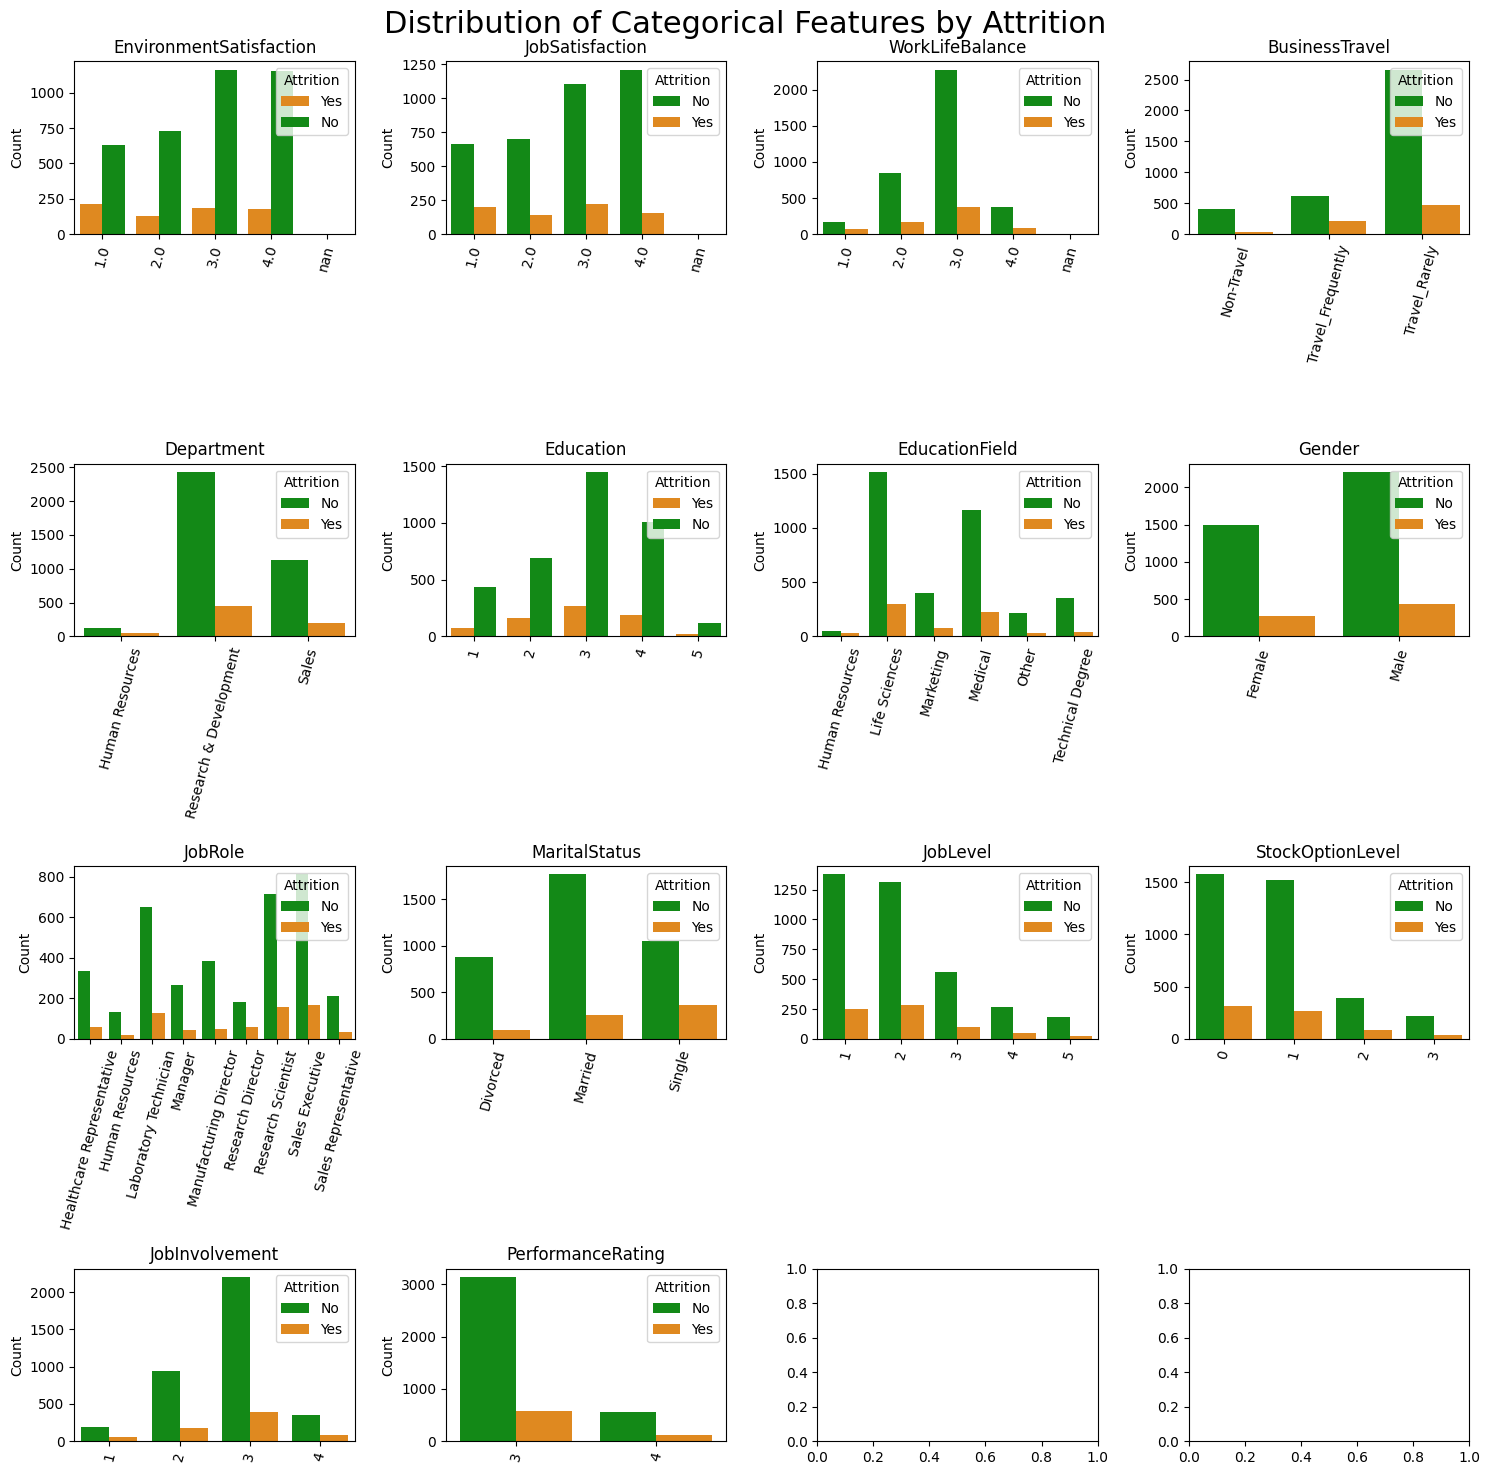

In [9]:
# Initialize the plot
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Plot each feature
for i, ax in enumerate(axes.flatten()):
    if i>13:
        break
    sns.countplot(x=categorical_columns[i], hue='Attrition', data=data, ax=ax, palette={'No': '#009c05', 'Yes': 'darkorange'},
                 order=np.sort(data[categorical_columns[i]].unique()))
    ax.set_title(categorical_columns[i])
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=75, labelright=True)
    ax.legend(title='Attrition', loc='upper right')

plt.suptitle('Distribution of Categorical Features by Attrition', fontsize=22)
plt.tight_layout()
plt.show()